In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

C:\Users\chauh\Anaconda3\envs\tensor\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
complaint_data = pd.read_excel('Datasets/Street light Complaint Details last 6 Month.xlsx')

In [3]:
complaint_data.head()

,,Agent,Call Status,Date of Call,Language Preference,Unique Query Number,8835216789,sumit anand,Address,Landmark,...,Street Ligh Pole No,Street Ligh Ticket Type,Street Ligh Assigned To,Street Ligh Complaint From,Answer given by call center Agent,Date of Escalation,Answer given by Level 2,Date of reply by Level 2,Escalate To,Date of Call Closer
0,2019-01-04,WEBCONSUMER,OPEN,2019-01-04,ENGLISH,SLUP00104413,8835216789,sumit anand,C 12/15 LAHANGPURA VARANASU,DR IQBAL,...,-,CABLES/POWER SUPPLY,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-03,WEBCONSUMER,OPEN,2018-12-03,ENGLISH,SLUP00098562,8835216789,sumit anand,"DIDAYAL NAGAR, DURGAKUND ,VARANASI -231005",DIDAYALNAGAR UDAYAN ( PARK .),...,NaN,CABLES/POWER SUPPLY,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-14,WEBCONSUMER,OPEN,2018-11-14,ENGLISH,SLGJ00040122,8835216789,sumit anand,"PLOT NO. 1270/A1,SECTOR-3/A, GANDHINAGAR",NaN,...,138,LAMP,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-20,WEBCONSUMER,OPEN,2018-11-20,ENGLISH,SLGJ00040291,8835216789,sumit anand,GOLD COIN HIGHMAST BLINKING,GOLD COIN HIGHMAST BLINKING,...,NaN,NaN,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-23,WEBCONSUMER,OPEN,2018-11-23,ENGLISH,SLUP00096530,8835216789,sumit anand,BADA LALPUR,TRADE CENTAR KE PASS,...,NaN,OTHERS,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
complaint_data = complaint_data[:157163]

In [5]:
complaint_data = complaint_data.sort_values(by='Date of Call')

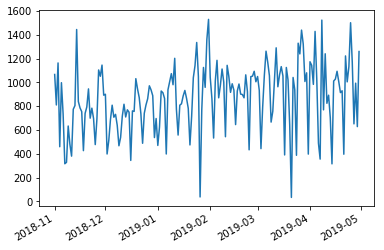

In [6]:
complaint_data['Date of Call'].value_counts().plot()

In [7]:
tmp = pd.DataFrame(complaint_data['Date of Call'].value_counts())

In [8]:
tmp.head()

,Date of Call
2019-01-31,1530
2019-04-08,1524
2019-04-25,1502
2018-11-14,1445
2019-03-27,1440


In [9]:
tmp = tmp.sort_index()

In [10]:
tmp.head()

,Date of Call
2018-11-01,1067
2018-11-02,811
2018-11-03,1164
2018-11-04,460
2018-11-05,998


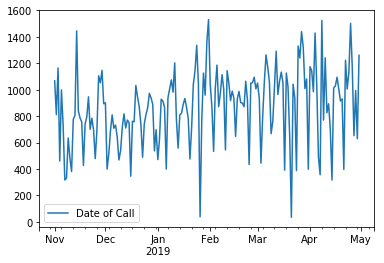

In [11]:
tmp.plot()

In [12]:
tmp=tmp.reset_index()

In [13]:
tmp.head()

,index,Date of Call
0,2018-11-01,1067
1,2018-11-02,811
2,2018-11-03,1164
3,2018-11-04,460
4,2018-11-05,998


In [14]:
tmp_array=np.array(tmp['Date of Call'])

In [15]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = tmp_array[:int(len(tmp_array)*.7)]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction

In [16]:
X_test=tmp_array[int(len(tmp_array)*.7):]

In [17]:
x_test,y_test=split_sequence(X_test,3)

In [18]:
y_hat=[]
for i in x_test:
    x=np.array(i)
    x=x.reshape((1,n_steps,n_features))
    temp = model.predict(x)
    y_hat.append(temp[0][0])            

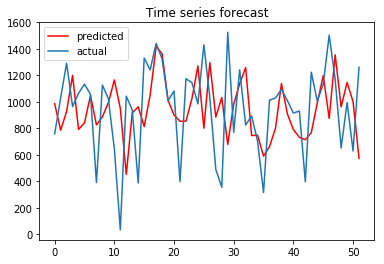

In [19]:
plt.plot(y_hat,color='red', label='predicted')
plt.plot(y_test, label='actual')
plt.legend()
plt.title('Time series forecast')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
print("MSE = ", mean_squared_error(y_test, y_hat))

MSE =  136197.38319380584


In [21]:
# define model
model_1 = Sequential()
model_1.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
#model_1.add(LSTM(32, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')
# fit model
model_1.fit(X, y, epochs=500, verbose=0)

In [22]:
y_hat_1=[]
for i in x_test:
    x=np.array(i)
    x=x.reshape((1,n_steps,n_features))
    temp = model_1.predict(x)
    y_hat_1.append(temp[0][0])            

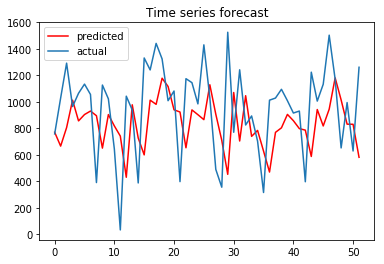

MSE:  151369.48989264012


In [23]:
plt.plot(y_hat_1,color='red', label='predicted')
plt.plot(y_test, label='actual')
plt.legend()
plt.title('Time series forecast')
plt.show()
print('MSE: ', mean_squared_error(y_hat_1, y_test))

In [24]:
# define model
model_2 = Sequential()
model_2.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_2.add(LSTM(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mse')
# fit model
model_2.fit(X, y, epochs=500, verbose=0)

In [25]:
y_hat_2=[]
for i in x_test:
    x=np.array(i)
    x=x.reshape((1,n_steps,n_features))
    temp = model_2.predict(x)
    y_hat_2.append(temp[0][0])            

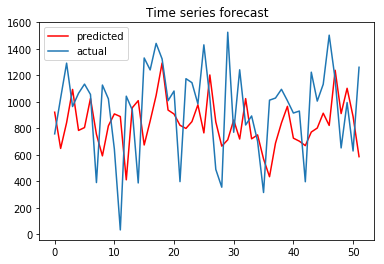

MSE:  146084.1812868731


In [26]:
plt.plot(y_hat_2,color='red', label='predicted')
plt.plot(y_test, label='actual')
plt.legend()
plt.title('Time series forecast')
plt.show()
print('MSE: ', mean_squared_error(y_hat_2, y_test))

In [27]:
# define model
model_3 = Sequential()
model_3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_3.add(LSTM(32, activation='relu', return_sequences=True))
model_3.add(LSTM(16, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(1))

model_3.compile(optimizer='rmsprop', loss='mse')
# fit model
model_3.fit(X, y, epochs=500, verbose=0)

In [28]:
y_hat_3=[]
for i in x_test:
    x=np.array(i)
    x=x.reshape((1,n_steps,n_features))
    temp = model_3.predict(x)
    y_hat_3.append(temp[0][0])            

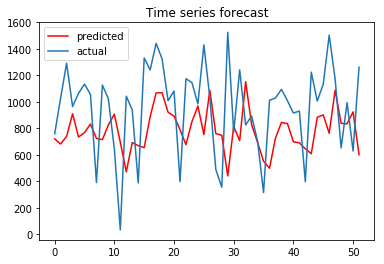

MSE:  150605.6541322175


In [29]:
plt.plot(y_hat_3,color='red', label='predicted')
plt.plot(y_test, label='actual')
plt.legend()
plt.title('Time series forecast')
plt.show()
print('MSE: ', mean_squared_error(y_hat_3, y_test))

In [30]:
# define model
model_4 = Sequential()
model_4.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model_4.add(LSTM(64, activation='relu', return_sequences=True))
model_4.add(LSTM(32, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(1))

model_4.compile(optimizer='rmsprop', loss='mse')
# fit model
model_4.fit(X, y, epochs=1000, verbose=0)

In [31]:
y_hat_4=[]
for i in x_test:
    x=np.array(i)
    x=x.reshape((1,n_steps,n_features))
    temp = model_4.predict(x)
    y_hat_4.append(temp[0][0])            

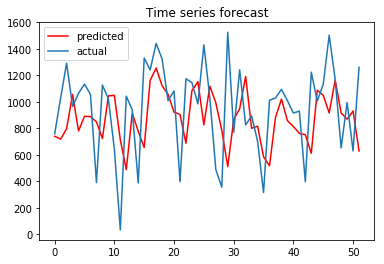

MSE:  134318.1448980123


In [32]:
plt.plot(y_hat_4,color='red', label='predicted')
plt.plot(y_test, label='actual')
plt.legend()
plt.title('Time series forecast')
plt.show()
print('MSE: ', mean_squared_error(y_hat_4, y_test))

In [33]:
# define model
model_5 = Sequential()
model_5.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
#model_5.add(LSTM(64, activation='relu', return_sequences=True))
model_5.add(LSTM(32, activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(1))

model_5.compile(optimizer='rmsprop', loss='mse')
# fit model
model_5.fit(X, y, epochs=1000, verbose=0)

In [34]:
y_hat_5=[]
for i in x_test:
    x=np.array(i)
    x=x.reshape((1,n_steps,n_features))
    temp = model_5.predict(x)
    y_hat_5.append(temp[0][0])            

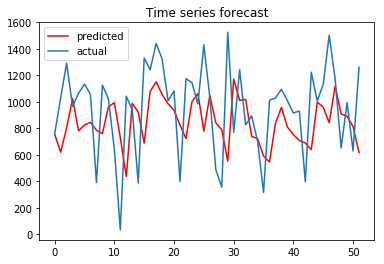

MSE:  135469.80268106173


In [35]:
plt.plot(y_hat_5,color='red', label='predicted')
plt.plot(y_test, label='actual')
plt.legend()
plt.title('Time series forecast')
plt.show()
print('MSE: ', mean_squared_error(y_hat_5, y_test))

In [36]:
# define model
model_6 = Sequential()
model_6.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
#model_5.add(LSTM(64, activation='relu', return_sequences=True))
model_6.add(LSTM(32, activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(1))

model_6.compile(optimizer='adam', loss='mse')
# fit model
model_6.fit(X, y, epochs=1000, verbose=0)

In [37]:
y_hat_6=[]
for i in x_test:
    x=np.array(i)
    x=x.reshape((1,n_steps,n_features))
    temp = model_6.predict(x)
    y_hat_6.append(temp[0][0])            

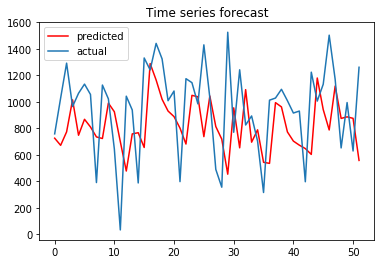

MSE:  143759.82423536375


In [38]:
plt.plot(y_hat_6,color='red', label='predicted')
plt.plot(y_test, label='actual')
plt.legend()
plt.title('Time series forecast')
plt.show()
print('MSE: ', mean_squared_error(y_hat_6, y_test))

In [40]:
model_5.save('model_full.h5')

In [41]:
y_hat_5-y_test

array([  -2.92999268, -408.25793457, -488.16094971,   60.40319824,
       -283.06695557, -307.9855957 , -210.14727783,  394.48632812,
       -366.42181396,  -61.45947266,  349.35858154,  695.45025635,
       -606.26361084,   50.79296875,  533.97631836, -641.62329102,
       -162.40429688, -289.52929688, -267.55554199,  -22.92303467,
       -145.08001709,  426.48516846, -451.14312744, -144.45678711,
         77.29187012, -651.30041504,   18.67736816,  350.79901123,
        434.05291748, -971.9019165 ,  401.18847656, -231.05053711,
        192.62683105, -153.3659668 ,   19.50891113,  273.99743652,
       -466.24108887, -189.93060303, -136.01226807, -198.28637695,
       -163.42376709, -221.29388428,  291.9397583 , -583.23052979,
         -8.09631348, -173.18426514, -659.65435791,  -50.27575684,
        256.27618408, -103.36334229,  183.67327881, -643.07159424])

In [43]:
x_test[44]

array([ 930,  397, 1223], dtype=int64)

In [44]:
y_test[44]

1005

In [45]:
y_hat_5[44]

996.9037